# Employees Absenteeism - Project 2

In [6]:
#Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#Import library for PCA
from sklearn.decomposition import PCA
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import chi2_contingency

In [7]:
# Setting working directory
os.chdir("Z:/Edwisor Project 2/Employee Absenteeism")
# Loading data
emp_absent = pd.read_excel("Absenteeism_at_work_Project.xls")

In [8]:
#It is very important to get the number of Rows and Columns in our DataSet
print("Rows:-",emp_absent.shape[0])
print("Columns:-",emp_absent.shape[1])

Rows:- 740
Columns:- 21


In [9]:
# First 5 rows of data
emp_absent.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [10]:
# Data Types of all the variables
emp_absent.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [11]:
# Number of Unique values present in each variable
emp_absent.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [12]:
#Transform data types
emp_absent['ID'] = emp_absent['ID'].astype('category')
emp_absent['Reason for absence'] = emp_absent['Reason for absence'].replace(0,20)
emp_absent['Reason for absence'] = emp_absent['Reason for absence'].astype('category')
emp_absent['Month of absence'] = emp_absent['Month of absence'].replace(0,np.nan)
emp_absent['Month of absence'] = emp_absent['Month of absence'].astype('category')
emp_absent['Day of the week'] = emp_absent['Day of the week'].astype('category')
emp_absent['Seasons'] = emp_absent['Seasons'].astype('category')
emp_absent['Disciplinary failure'] = emp_absent['Disciplinary failure'].astype('category')
emp_absent['Education'] = emp_absent['Education'].astype('category')
emp_absent['Son'] = emp_absent['Son'].astype('category')
emp_absent['Social drinker'] = emp_absent['Social drinker'].astype('category')
emp_absent['Social smoker'] = emp_absent['Social smoker'].astype('category')
emp_absent['Pet'] = emp_absent['Pet'].astype('category')
pd.to_numeric(emp_absent['Month of absence'], errors='coerce')
emp_absent.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [13]:
#Make a copy of dataframe
df = emp_absent.copy()

In [14]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [15]:
#Creating dataframe with number of missing values
missing_val = pd.DataFrame(df.isnull().sum())

#Reset the index to get row names as columns
missing_val = missing_val.reset_index()

#Rename the columns
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_perc'})
missing_val

#Calculate percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(df))*100

#Sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values('Missing_perc', ascending = False).reset_index(drop = True)

missing_val

,Variables,Missing_perc
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [16]:
#Removing the rows whose Absenteeism time in hours is zero, those will not provide any meaningful information in our prediction
emp_absent=emp_absent.loc[emp_absent['Absenteeism time in hours']!= 0,:]
df = df.loc[df['Absenteeism time in hours']!= 0,:]

In [17]:
#Given below is the number of missing values for each variables
emp_absent.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body mass index                    29
Absenteeism time in hours          22
dtype: int64

In [18]:
#treating missing value of "Reason for absence"
for i in [1,3,8]:
    emp_absent.loc[emp_absent['Reason for absence'].isnull() & emp_absent['Absenteeism time in hours']==i,\
                   'Reason for absence']=emp_absent.loc[emp_absent['Absenteeism time in hours']==i , 'Reason for absence'].mode()[0]
#treating missing value of "Month of absence"
emp_absent['Month of absence'] = emp_absent['Month of absence'].fillna(emp_absent['Month of absence'].mode()[0])
#treating missing value of "Transportation expense"
for i in [11,31,50,51,52]:
    emp_absent.loc[(emp_absent['Transportation expense'].isnull()) & (emp_absent['Distance from Residence to Work']==i),\
    'Transportation expense'] = emp_absent.loc[emp_absent['Distance from Residence to Work']==i,'Transportation expense'].mode()[0]
    emp_absent.loc[(emp_absent['Transportation expense'].isnull()) & (emp_absent['ID']==22),\
'Transportation expense'] = emp_absent.loc[emp_absent['ID']==22,'Transportation expense'].mode()[0]
#treating missing value of "Distance from Residence to Work"
emp_absent.loc[(emp_absent['Distance from Residence to Work'].isnull()) & (emp_absent['ID']==34),\
               'Distance from Residence to Work'] = emp_absent.loc[emp_absent['ID']==34,'Distance from Residence to Work'].mode()[0]
emp_absent.loc[(emp_absent['Distance from Residence to Work'].isnull()) & (emp_absent['ID']==22),\
               'Distance from Residence to Work'] = emp_absent.loc[emp_absent['ID']==22,'Distance from Residence to Work'].mode()[0]
emp_absent.loc[(emp_absent['Distance from Residence to Work'].isnull()) & (emp_absent['ID']==28),\
               'Distance from Residence to Work'] = emp_absent.loc[emp_absent['ID']==28,'Distance from Residence to Work'].mode()[0]
#treating missing value of "Service time"
emp_absent.loc[(emp_absent['Service time'].isnull()) & (emp_absent['ID']==34),'Service time'] = emp_absent.loc[emp_absent['ID']==34,'Service time'].mode()[0]
emp_absent.loc[(emp_absent['Service time'].isnull()) & (emp_absent['ID']==28),'Service time'] = emp_absent.loc[emp_absent['ID']==28,'Service time'].mode()[0]
#treating missing value of "Age"
emp_absent.loc[(emp_absent['Age'].isnull()) & (emp_absent['ID']==24),'Age'] = emp_absent.loc[emp_absent['ID']==24,'Age'].mode()[0]
emp_absent.loc[(emp_absent['Age'].isnull()) & (emp_absent['ID']==28),'Age'] = emp_absent.loc[emp_absent['ID']==28,'Age'].mode()[0]
#treating missing value of "Disciplinary failure"
emp_absent['Disciplinary failure'] = emp_absent['Disciplinary failure'].fillna(emp_absent['Disciplinary failure'].mode()[0])
#treating missing value of "Work load Average/day"
for i in [(9,92),(10,93),(11,93),(12,97),(1,95),(5,92)]:
    emp_absent.loc[((emp_absent['Work load Average/day '].isnull()) & (emp_absent['Month of absence']==i[0])) & (emp_absent['Hit target']==i[1]),'Work load Average/day '] = emp_absent.loc[(emp_absent['Month of absence']==i[0]) & (emp_absent['Hit target']==i[1]),'Work load Average/day '].mode()[0]
#treating missing value of "Hit target"
for i in [(4,5),(4,4),(2,6),(2,3),(2,4)]:
    emp_absent.loc[((emp_absent['Hit target'].isnull()) & (emp_absent['Seasons']==i[0])) & (emp_absent['Day of the week']==i[1]),'Hit target'] = emp_absent.loc[(emp_absent['Seasons']==i[0]) & (emp_absent['Day of the week']==i[1]),'Hit target'].mode()[0]
#treating missing value of "Education"
for i in [11,10,34,14,24]:
    emp_absent.loc[(emp_absent['Education'].isnull()) & (emp_absent['ID']==i),'Education'] = emp_absent.loc[emp_absent['ID']==i,'Education'].mode()[0]
#treating missing value of "Son"
for i in [20,14,34,27,1]:
    emp_absent.loc[(emp_absent['Son'].isnull()) & (emp_absent['ID']==i),'Son'] = emp_absent.loc[emp_absent['ID']==i,'Son'].mode()[0]
#treating missing value of "Social drinker"
for i in [10,14,17]:
    emp_absent.loc[(emp_absent['Social drinker'].isnull()) & (emp_absent['ID']==i),'Social drinker'] = emp_absent.loc[emp_absent['ID']==i,'Social drinker'].mode()[0]
#treating missing value of "Social smoker"
for i in [34,1,11,15]:
    emp_absent.loc[(emp_absent['Social smoker'].isnull()) & (emp_absent['ID']==i),'Social smoker'] = emp_absent.loc[emp_absent['ID']==i,'Social smoker'].mode()[0]
#treating missing value of "Pet"
for i in [1,13]:
    emp_absent.loc[(emp_absent['Pet'].isnull()) & (emp_absent['ID']==i),'Pet'] = emp_absent.loc[emp_absent['ID']==i,'Pet'].mode()[0]
#treating missing value of "Weight"
for i in [27]:
    emp_absent.loc[(emp_absent['Weight'].isnull()) & (emp_absent['ID']==i),'Weight'] = emp_absent.loc[emp_absent['ID']==i,'Weight'].mode()[0]
#treating missing value of "Height"
for i in [20,10,28,34,27,11,5,22,13,24,32]:
    emp_absent.loc[(emp_absent['Height'].isnull()) & (emp_absent['ID']==i),'Height'] = emp_absent.loc[emp_absent['ID']==i,'Height'].mode()[0]
#treating missing value of "Body mass index"
for i in [3,24,11,30,2,19,34,28,13,36,14,20,18,17,15,22,5]:
    emp_absent.loc[(emp_absent['Body mass index'].isnull()) & (emp_absent['ID']==i),'Body mass index'] = emp_absent.loc[emp_absent['ID']==i,'Body mass index'].mode()[0]
#treating missing value of "Absenteeism time in hours"
emp_absent['Absenteeism time in hours'] = emp_absent['Absenteeism time in hours'].fillna(emp_absent['Absenteeism time in hours'].mode()[0])
    
emp_absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

                                 Distance from Residence to Work  \
Distance from Residence to Work                         1.000000   
Absenteeism time in hours                              -0.107993   

                                 Absenteeism time in hours  
Distance from Residence to Work                  -0.107993  
Absenteeism time in hours                         1.000000  


Z:\anaconda\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



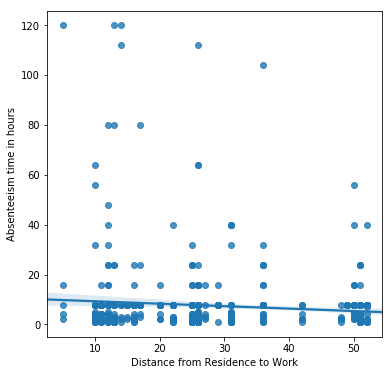

                           Service time  Absenteeism time in hours
Service time                   1.000000                   0.016375
Absenteeism time in hours      0.016375                   1.000000


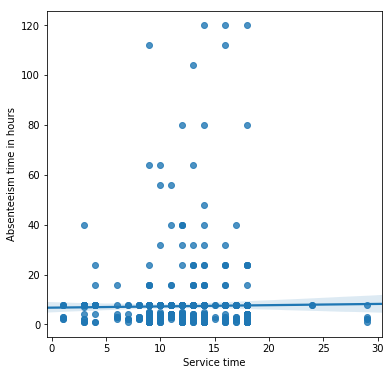

                                Age  Absenteeism time in hours
Age                        1.000000                   0.093778
Absenteeism time in hours  0.093778                   1.000000


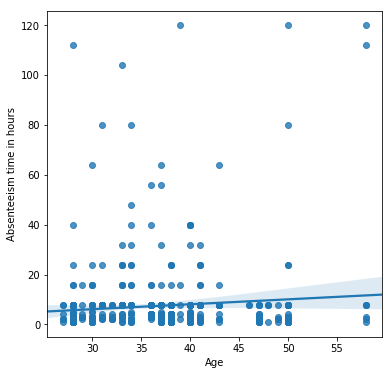

                           Work load Average/day   Absenteeism time in hours
Work load Average/day                    1.000000                   0.029233
Absenteeism time in hours                0.029233                   1.000000


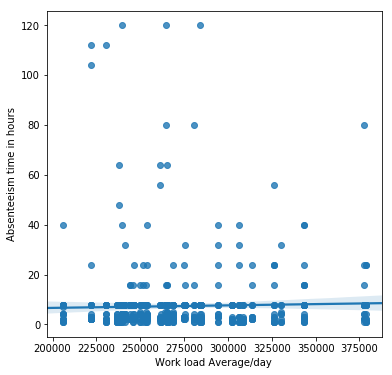

                           Transportation expense  Absenteeism time in hours
Transportation expense                   1.000000                   0.063439
Absenteeism time in hours                0.063439                   1.000000


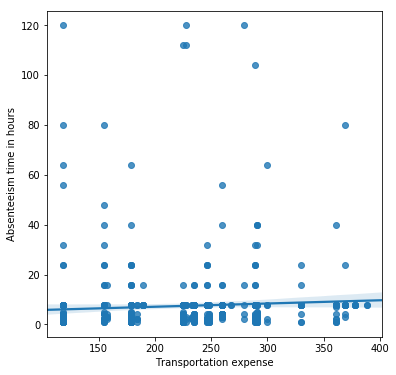

                           Hit target  Absenteeism time in hours
Hit target                   1.000000                   0.005532
Absenteeism time in hours    0.005532                   1.000000


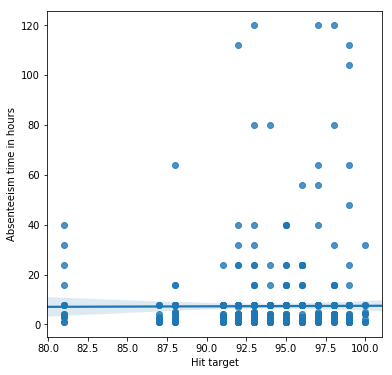

                             Weight  Absenteeism time in hours
Weight                     1.000000                   0.001352
Absenteeism time in hours  0.001352                   1.000000


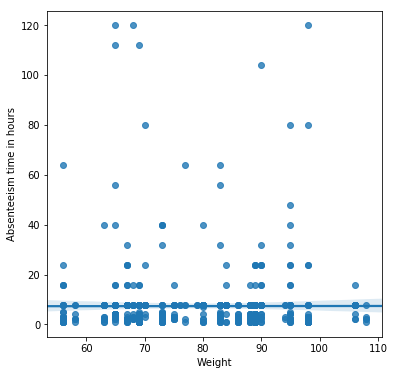

                             Height  Absenteeism time in hours
Height                     1.000000                   0.092822
Absenteeism time in hours  0.092822                   1.000000


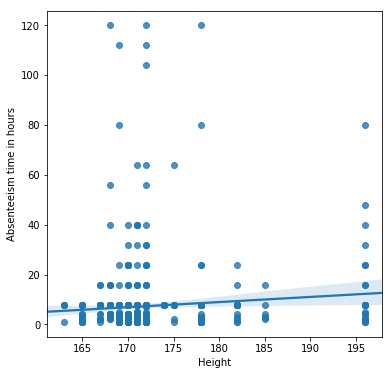

                           Body mass index  Absenteeism time in hours
Body mass index                   1.000000                  -0.044525
Absenteeism time in hours        -0.044525                   1.000000


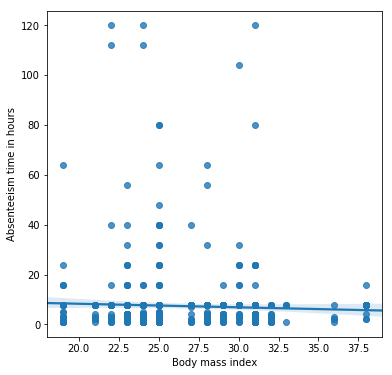

                           Absenteeism time in hours  \
Absenteeism time in hours                        1.0   
Absenteeism time in hours                        1.0   

                           Absenteeism time in hours  
Absenteeism time in hours                        1.0  
Absenteeism time in hours                        1.0  


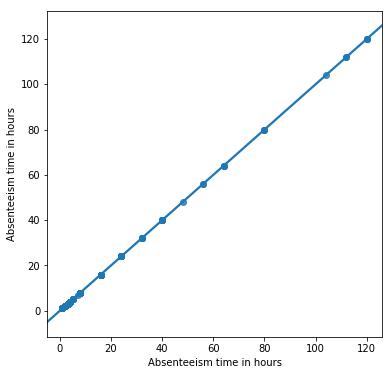

In [19]:
#This  function will take the data frame and Numerical columns as input and will give  scatter plot with regression line and correlationship as out[put to show the relationship between two numerical variables
    
def reg_plots(emp_absent,continuous_vars,target_var):
  
    for col in continuous_vars:
        core=emp_absent[[col,target_var]].corr()
        print(core)
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = sns.regplot(x=col, y=target_var,data=emp_absent)
        plt.show()
reg_plots(emp_absent,continuous_vars,'Absenteeism time in hours')


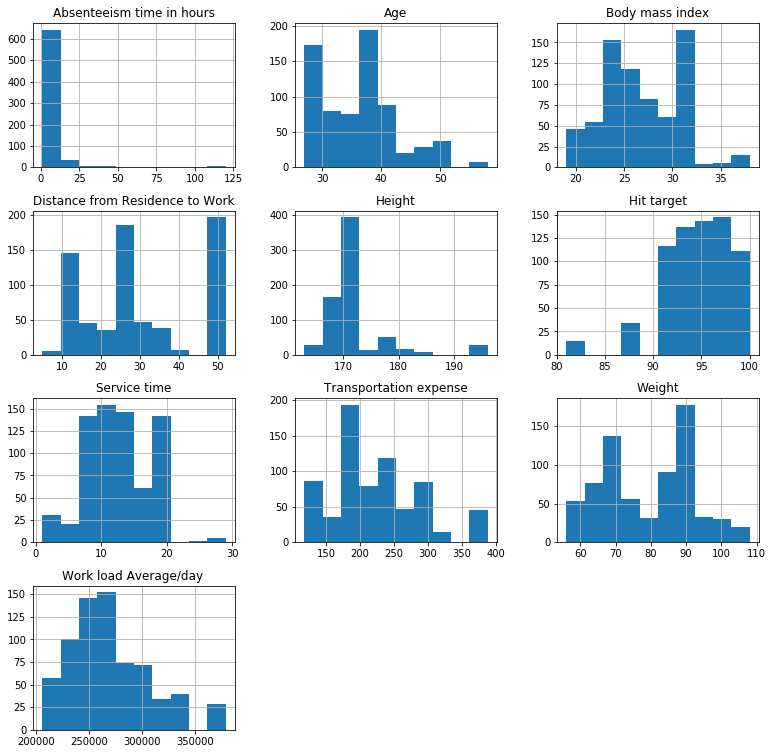

In [20]:
#Histogram gives us the understanding if our variables are normally distributed or not
pd.DataFrame.hist(emp_absent.loc[:,continuous_vars], figsize = [13,13]);

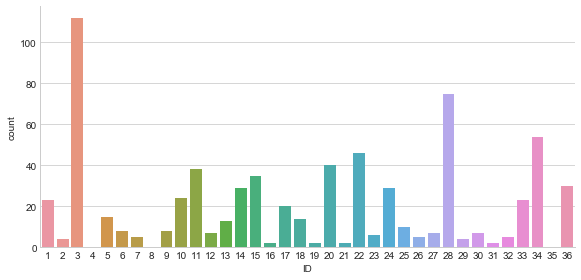

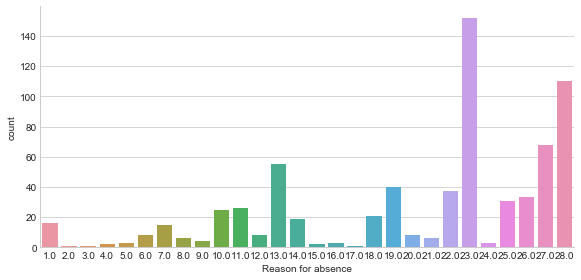

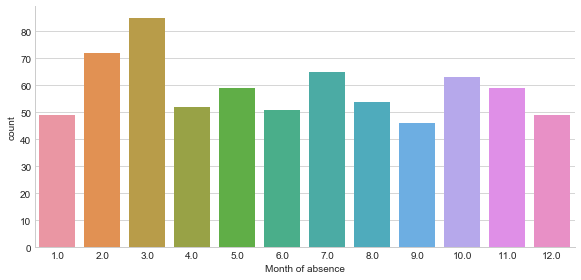

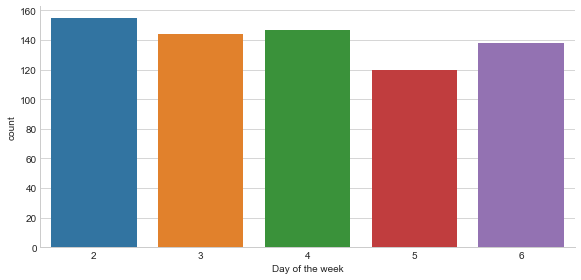

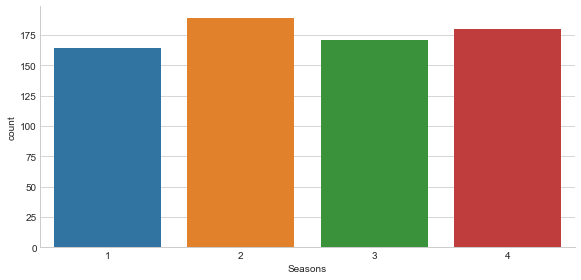

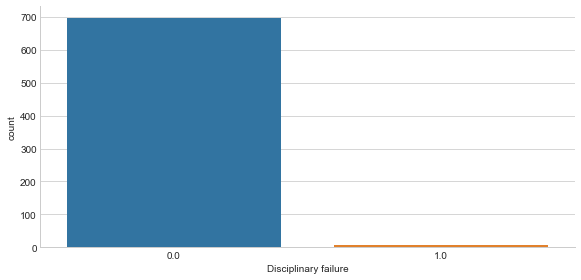

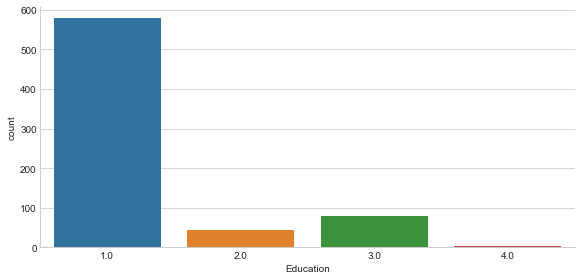

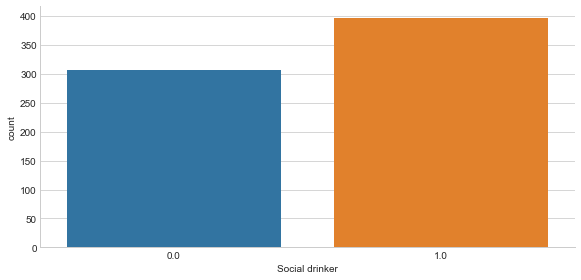

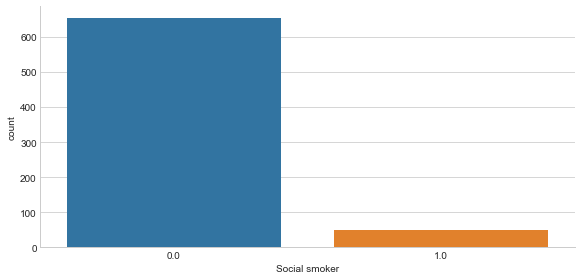

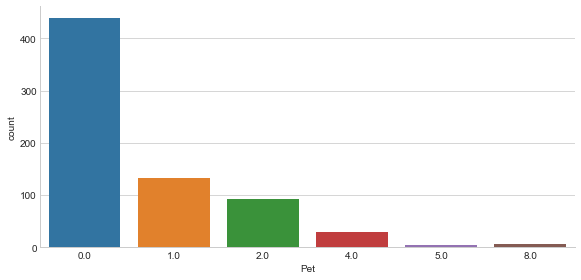

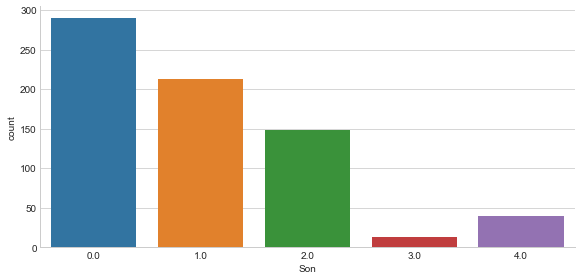

In [21]:
#Check the bar graph of categorical Data using factorplot
Categorical_columns =['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
for i in Categorical_columns:

    sns.set_style("whitegrid")
    sns.factorplot(data=emp_absent, x= i, kind= 'count',size=4,aspect=2)

ID and Absenteeism time in hours  target Variable
Reason for absence and Absenteeism time in hours  target Variable
Month of absence and Absenteeism time in hours  target Variable
Day of the week and Absenteeism time in hours  target Variable
Seasons and Absenteeism time in hours  target Variable
Disciplinary failure and Absenteeism time in hours  target Variable
Education and Absenteeism time in hours  target Variable
Social drinker and Absenteeism time in hours  target Variable
Social smoker and Absenteeism time in hours  target Variable
Pet and Absenteeism time in hours  target Variable
Son and Absenteeism time in hours  target Variable


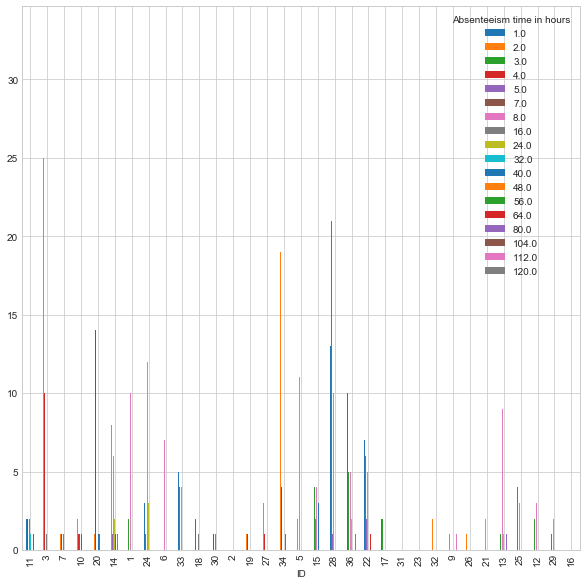

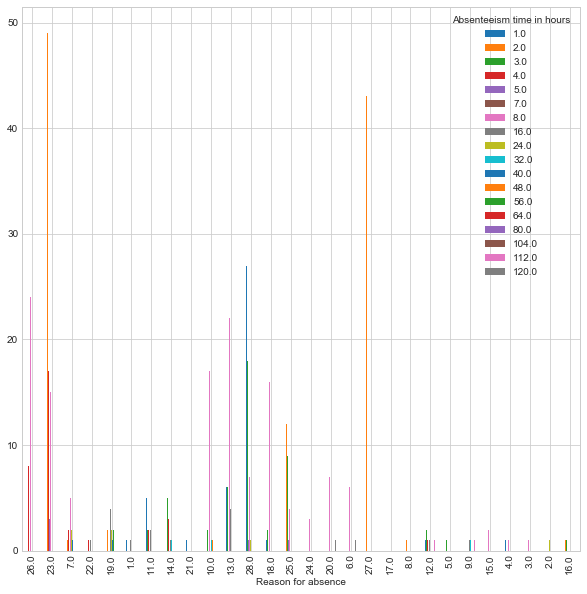

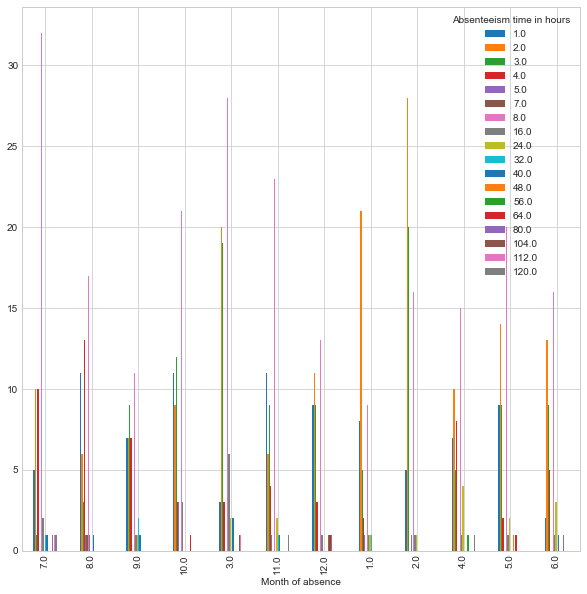

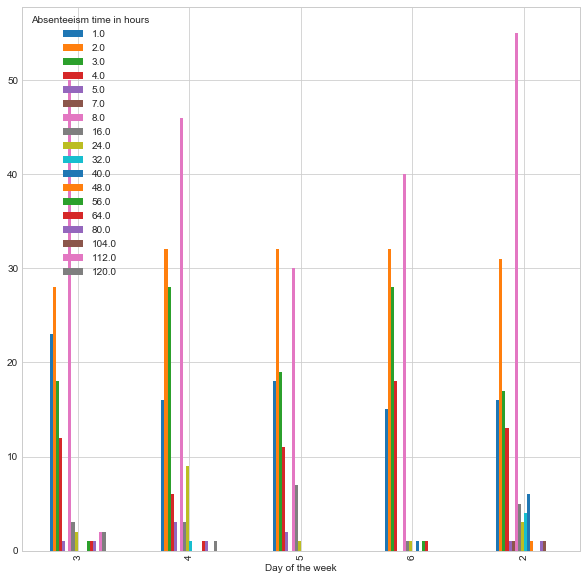

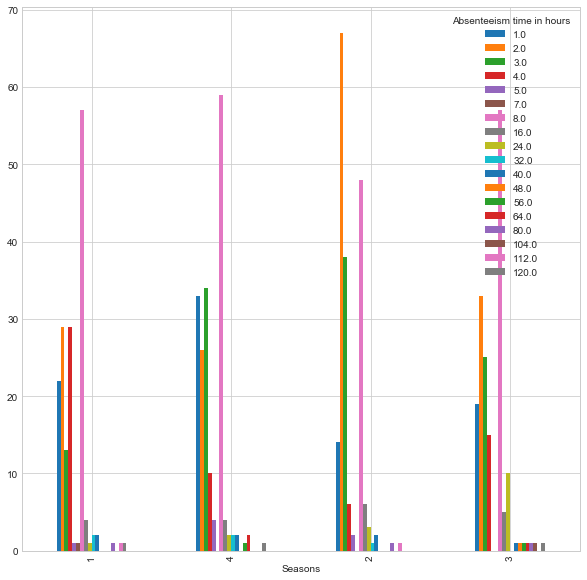

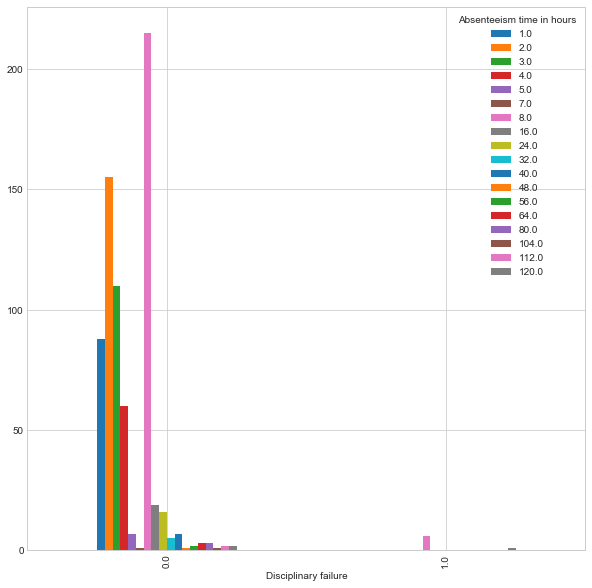

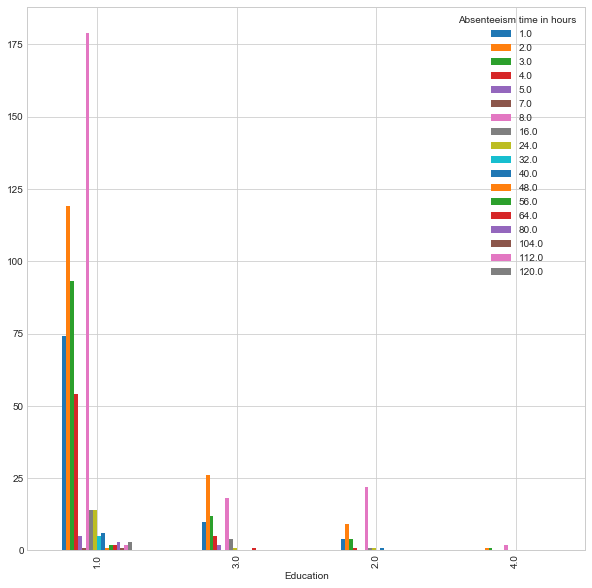

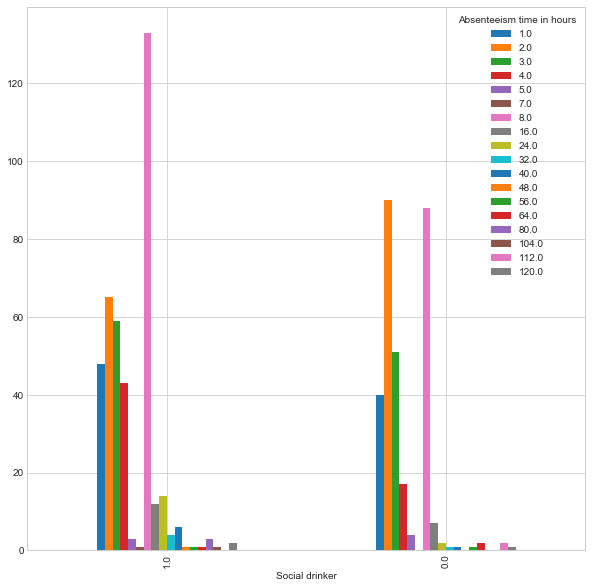

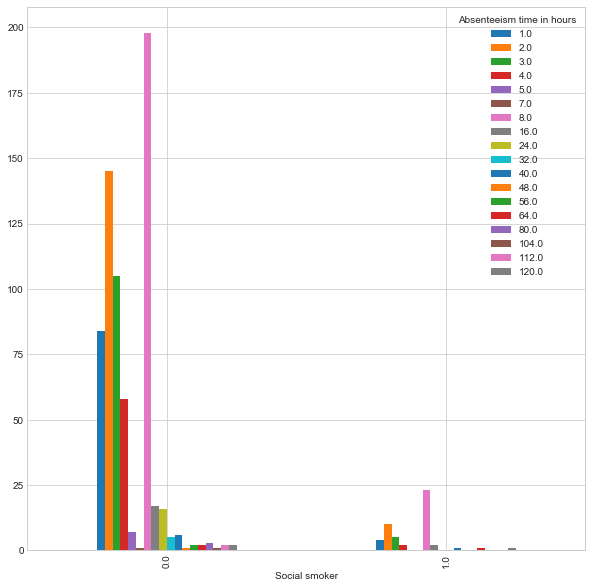

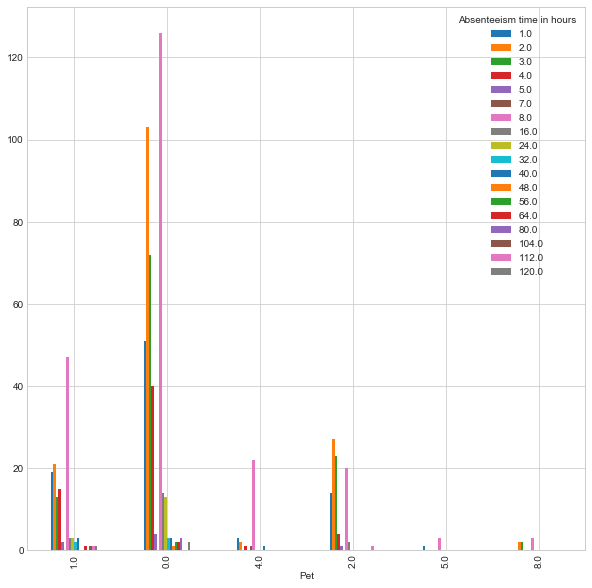

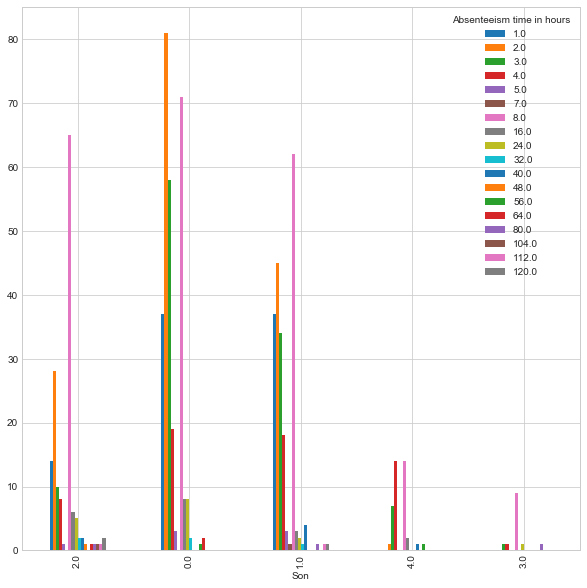

In [22]:
#This plot shows us relationship between numaric variables with Target variabbles
def group_plot(data , cat_columns,target_col):
    """ This  function will show the relationship between two categorical variables in grouped bar chart"""
    for col in cat_columns:
        print(col ,"and",target_col," target Variable")
        carat_table = pd.crosstab(index=data[col],columns=data[target_col])
        #print(carat_table)
        carat_table.plot(kind="bar", figsize=(10,10),stacked=False)
group_plot(emp_absent,Categorical_columns,'Absenteeism time in hours')

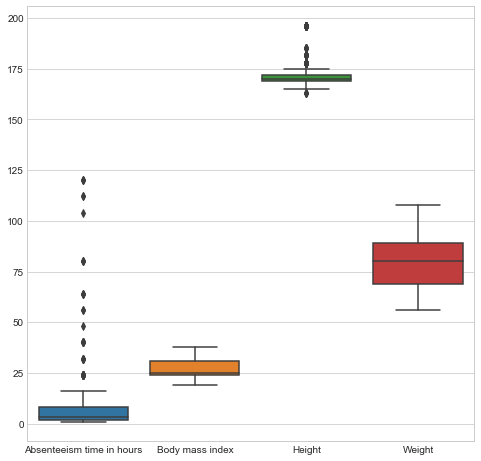

In [23]:
#Check for outliers in data using boxplot
sns.boxplot(data=emp_absent[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

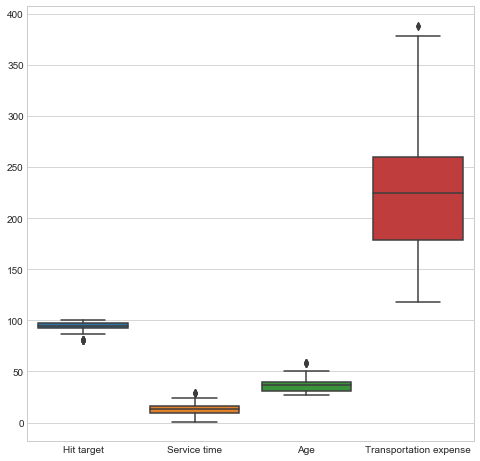

In [24]:
#Check for outliers in data using boxplot
sns.boxplot(data=emp_absent[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [25]:
#Check for outliers using boxplots
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(emp_absent[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    emp_absent.loc[emp_absent[i]< minimum,i] = minimum
    emp_absent.loc[emp_absent[i]> maximum,i] = maximum  

emp_absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

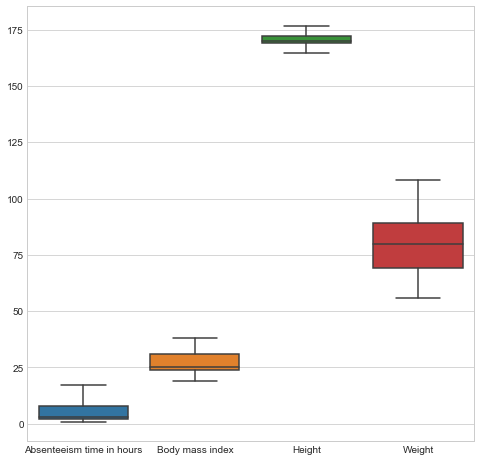

In [26]:
#Check for outliers in data using boxplot
sns.boxplot(data=emp_absent[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

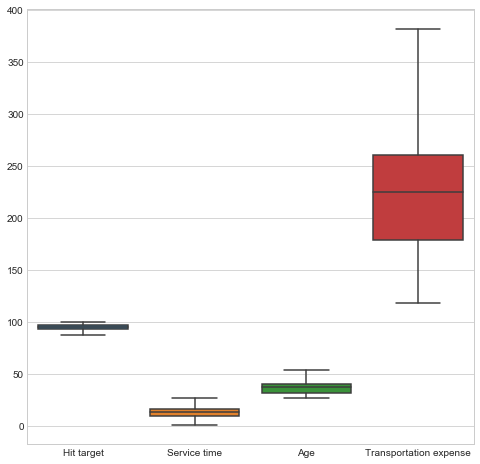

In [27]:
#Check for outliers in data using boxplot
sns.boxplot(data=emp_absent[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

[]

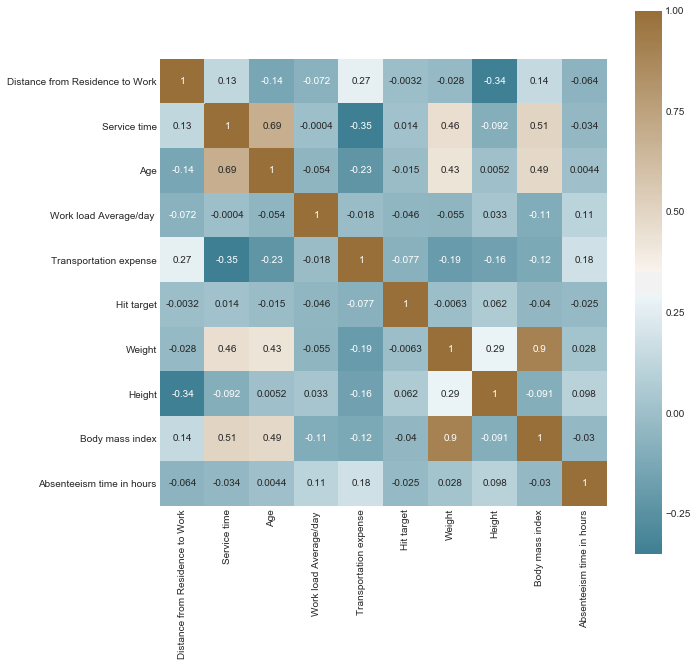

In [28]:
#Get dataframe with all continuous variables
df_corr = emp_absent.loc[:,continuous_vars]
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [29]:
#Droping the Weight variable as it has high correlation with "Body mass index" column
emp_absent = emp_absent.drop(["Weight"],axis=1)
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target','Body mass index','Height','Absenteeism time in hours']

In [30]:

factors_paired = [(i,j) for i in categorical_vars  for j in categorical_vars ] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(emp_absent[f[0]], emp_absent[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((11,11))
p1 = pd.DataFrame(p1, index=categorical_vars, columns=categorical_vars)
p1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet,Son
ID,0.000000e+00,4.430557e-66,1.801422e-10,2.748498e-06,4.975397e-08,1.404057e-04,0.000000e+00,1.693708e-127,1.693708e-127,0.000000e+00,0.000000e+00
Reason for absence,4.430557e-66,0.000000e+00,2.780478e-14,6.365581e-02,5.184032e-20,2.056484e-112,3.996864e-10,3.739724e-08,2.058208e-10,2.706928e-18,3.219051e-18
Month of absence,1.801422e-10,2.780478e-14,0.000000e+00,5.930522e-01,0.000000e+00,4.110885e-01,8.622314e-03,2.253099e-02,3.369797e-02,5.056429e-05,2.648063e-05
Day of the week,2.748498e-06,6.365581e-02,5.930522e-01,0.000000e+00,3.948001e-01,2.460672e-01,5.439849e-01,3.575265e-01,8.227146e-01,4.046197e-01,2.223057e-09
Seasons,4.975397e-08,5.184032e-20,0.000000e+00,3.948001e-01,0.000000e+00,2.425953e-02,6.286186e-02,1.981972e-01,1.569992e-01,1.772464e-04,1.059010e-05
Disciplinary failure,1.404057e-04,2.056484e-112,4.110885e-01,2.460672e-01,2.425953e-02,0.000000e+00,9.094792e-01,6.721064e-01,2.660185e-03,7.200002e-01,4.545640e-01
Education,0.000000e+00,3.996864e-10,8.622314e-03,5.439849e-01,6.286186e-02,9.094792e-01,0.000000e+00,3.391862e-34,1.984123e-24,1.176649e-29,9.146983e-12
Social drinker,1.693708e-127,3.739724e-08,2.253099e-02,3.575265e-01,1.981972e-01,6.721064e-01,3.391862e-34,0.000000e+00,1.515194e-02,1.196121e-26,3.706723e-09
Social smoker,1.693708e-127,2.058208e-10,3.369797e-02,8.227146e-01,1.569992e-01,2.660185e-03,1.984123e-24,1.515194e-02,0.000000e+00,5.706486e-14,4.132435e-21
Pet,0.000000e+00,2.706928e-18,5.056429e-05,4.046197e-01,1.772464e-04,7.200002e-01,1.176649e-29,1.196121e-26,5.706486e-14,0.000000e+00,2.225197e-88


In [31]:
#Dropping the "Pet" and "Son" columns as their P value with ID is zero.
emp_absent = emp_absent.drop(["Pet","Son"],axis=1)
categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker']
df = emp_absent.copy()

In [32]:
#Normalization of continuous variables.
for i in continuous_vars:
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [33]:
#Encode  Categorical variables. 
def encoding_categorical(data , cat_columns):
    for col in cat_columns:
        data[col]=data[col].astype("category")
        data[col]=data[col].cat.codes
        return data
encoding_categorical(df,categorical_vars)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Social drinker,Social smoker,Height,Body mass index,Absenteeism time in hours
0,10,26.0,7.0,3,1,0.648956,0.659574,0.470588,0.226415,0.239024,0.769231,0.0,1.0,1.0,0.0,0.625000,0.578947,0.1875
2,2,23.0,7.0,4,1,0.231499,0.978723,0.666667,0.415094,0.239024,0.769231,0.0,1.0,1.0,0.0,0.458333,0.631579,0.0625
3,6,7.0,7.0,5,1,0.611006,0.000000,0.509804,0.452830,0.239024,0.769231,0.0,1.0,1.0,1.0,0.291667,0.263158,0.1875
4,10,23.0,7.0,5,1,0.648956,0.659574,0.470588,0.226415,0.239024,0.769231,0.0,1.0,1.0,0.0,0.625000,0.578947,0.0625
5,2,23.0,7.0,6,1,0.231499,0.978723,0.666667,0.415094,0.239024,0.769231,0.0,1.0,1.0,0.0,0.458333,0.631579,0.4375
6,9,22.0,7.0,6,1,0.922201,1.000000,0.078431,0.037736,0.239024,0.769231,0.0,1.0,1.0,0.0,0.625000,0.421053,0.4375
7,19,23.0,7.0,6,1,0.538899,0.957447,0.392157,0.339623,0.239024,0.769231,0.0,1.0,1.0,0.0,0.291667,0.210526,0.1875
8,13,19.0,7.0,2,1,0.140417,0.148936,0.509804,0.264151,0.239024,0.769231,0.0,1.0,1.0,0.0,1.000000,0.315789,1.0000
9,0,22.0,7.0,2,1,0.444023,0.127660,0.509804,0.377358,0.239024,0.769231,0.0,3.0,0.0,0.0,0.625000,0.526316,0.4375
10,19,1.0,7.0,2,1,0.538899,0.957447,0.392157,0.339623,0.239024,0.769231,0.0,1.0,1.0,0.0,0.291667,0.210526,0.4375


In [34]:
#Create dummy variables of factor variables
df = pd.get_dummies(data = emp_absent, columns = categorical_vars)
df.shape

(704, 104)

In [35]:
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, df.columns.get_loc("Absenteeism time in hours")], test_size = 0.30, random_state = 1)

In [36]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
427     8.0   8.0
448    17.0   3.5
353     4.0  17.0
194     8.0  17.0
190     4.0   1.0
Root Mean Squared Error: 4.816472570135526
R^2 Score(coefficient of determination) = -0.2791694220097831


In [37]:
#Random Forest
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual       pred
427     8.0   8.714500
448    17.0   3.309055
353     4.0   7.091000
194     8.0  11.004000
190     4.0   3.241667
Root Mean Squared Error: 3.5838845700278474
R^2 Score(coefficient of determination) = 0.2917641384919891


In [38]:
#Linear Regression
#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual      pred
427     8.0  9.539284
448    17.0  4.132054
353     4.0  9.453695
194     8.0  8.775791
190     4.0  4.034038
Root Mean Squared Error: 3.729806525862978
R^2 Score(coefficient of determination) = 0.23291675713968785


In [39]:
#Get the target variable
target = df['Absenteeism time in hours']
#Get the number of rows and columns of data
i=df.shape[1]

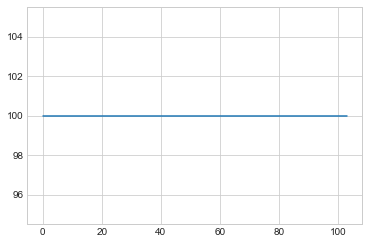

In [40]:
#Converting data to numpy array
X = df.values

#Data has 104 variables so no of components of PCA = 103
pca = PCA(n_components=i)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [41]:
#Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=60)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

In [42]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
427     8.0   8.0
448    17.0  17.0
353     4.0   4.0
194     8.0   8.0
190     4.0   4.0
Root Mean Squared Error: 0.0
R^2 Score(coefficient of determination) = 1.0


In [43]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual  pred
427     8.0   8.0
448    17.0  17.0
353     4.0   4.0
194     8.0   8.0
190     4.0   4.0
Root Mean Squared Error: 0.0014683420476150149
R^2 Score(coefficient of determination) = 0.9999998755444062


In [44]:
#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
427     8.0   8.0
448    17.0  17.0
353     4.0   4.0
194     8.0   8.0
190     4.0   4.0
Root Mean Squared Error: 1.8249407046255266e-11
R^2 Score(coefficient of determination) = 1.0
